In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('merged_consommation.csv')
data

,Unnamed: 0,type_avion,age_avion,nombre_passagers,consommation_carburant
0,0,A320,2011.0,163.0,0.579232
1,1,A320,2011.0,163.0,0.597330
2,2,A320,2011.0,163.0,0.651342
3,3,A320,2011.0,163.0,0.819361
4,4,A320,NaN,NaN,0.698643
...,...,...,...,...,...
2343,88,B738,2018.0,189.0,1.095160
2344,89,B738,2018.0,189.0,0.961705
2345,90,B738,2017.0,189.0,0.670580
2346,91,B738,2017.0,189.0,0.944837


In [8]:


df_passagers = data.filter(items=['nombre_passagers','consommation_carburant'])
df_type = data.filter(items = ['type_avion','consommation_carburant'] )
df_age = data.filter(items = ['age_avion','consommation_carburant'] )


df_passagers.dropna(subset=['nombre_passagers'], inplace=True)
df_passagers

,nombre_passagers,consommation_carburant
0,163.0,0.579232
1,163.0,0.597330
2,163.0,0.651342
3,163.0,0.819361
20,150.0,0.676324
...,...,...
2343,189.0,1.095160
2344,189.0,0.961705
2345,189.0,0.670580
2346,189.0,0.944837


c:\Users\chell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


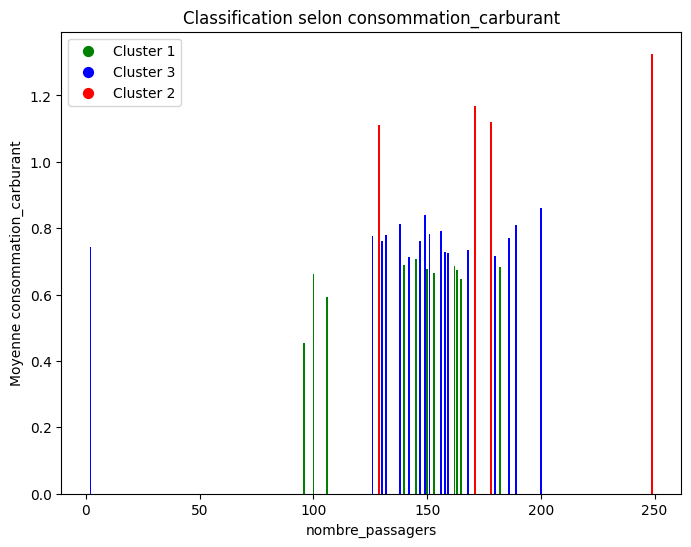

In [9]:
ind = 'consommation_carburant'
facteur = 'nombre_passagers'

grouped_data = data.groupby(facteur)[ind].mean().reset_index()

# Application de l'algorithme K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(grouped_data[[ind]])
labels = kmeans.labels_

colors = ['g', 'b', 'r']
# Assign each label to a color based on its rank (i.e., the label with the highest mean value gets the first color, etc.)
mean_values = grouped_data.groupby(labels)[ind].mean().sort_values()
color_map = {label: colors[i] for i, label in enumerate(mean_values.index)}

# Plot the results with bar color based on the cluster label
fig, ax = plt.subplots(figsize=(8, 6))
for i, label in enumerate(labels):
    color = color_map[label]
    ax.bar(grouped_data[facteur][i], grouped_data[ind][i], color=color)
legend_handles = [plt.scatter([], [], marker='o', s=50, c=color, label=f'Cluster {label+1}') 
                    for label, color in color_map.items()]
ax.legend(handles=legend_handles)
ax.set_xlabel(facteur)
ax.set_ylabel('Moyenne '+ind)
ax.set_title('Classification selon '+ind)
plt.show()